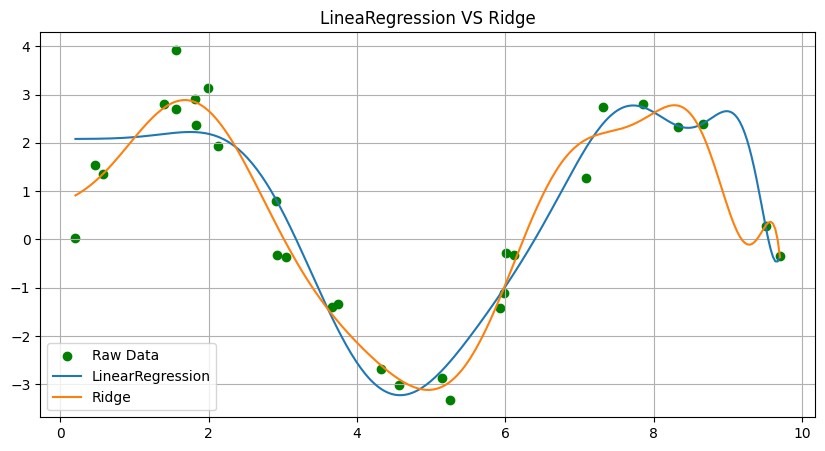

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
n_samples = 30
X = np.sort(np.random.rand(n_samples)) * 10       # 0~10초 사이의 영상 길이
y = np.sin(X) * 3 + np.random.randn(n_samples) * 0.5  # 사인파 형태 + 잡음(Noise)
X = X.reshape(-1, 1) # 2차원 배열 변환

degree = 15

model_overfit = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_overfit.fit(X, y)

alpha = 1.0
model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = alpha))
model_ridge.fit(X,y)

X_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_overfit = model_overfit.predict(X_line)
y_ridge = model_ridge.predict(X_line)

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], y, color='green',label='Raw Data')
plt.plot(X_line[:, 0], y_overfit, label='LinearRegression')
plt.plot(X_line[:, 0], y_ridge, label='Ridge')
plt.title('LineaRegression VS Ridge')
plt.legend()
plt.grid(True)
plt.show()